In [24]:
# Python data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tabular data machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc

In [21]:
import warnings
warnings.filterwarnings("ignore")

# Preprocess Data

In [5]:
data = pd.read_csv("Treasury Squeeze raw score data.csv").drop(columns=["rowindex"])

In [6]:
data.head()

,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [7]:
# Accucracy improved 2% after encoding contract
def encodingContract(data):
    data['contract_type'] = data['contract'].str[0:2]
    dummies = pd.get_dummies(data["contract_type"])
    
    data = pd.concat([data, dummies], axis = 1).drop(columns=["contract", "contract_type"])
    return data  

In [30]:
X = encodingContract(data.drop(columns=["squeeze"]))
y = data['squeeze']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit KNN Model

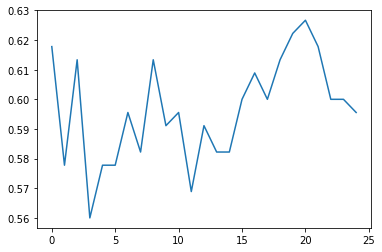

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# True and False cases are balanced, so it's reasonable to use accuracy as metrics
scores = []
for k in range(1, 26):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(scores)